# **A. DATA *UNDERSTANDING***

Data *Understanding* adalah tahapan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan bisnis yang diberikan

*   Data yang digunakan pada proyek kali ini adalah data kumpulan film *Movielens dataset* 
*   Dataset bersumber dari *repository dataset* kaggle.com dengan *link* berikut : https://www.kaggle.com/datasets/snehal1409/movielens, dan proses pengunduhan dilakukan melalui Kaggle API
*   Pada pengunduhan terdapat lima (5) *file* csv yang diunduh yang terdiri dari :  
1.   *Readme.txt*
2.   *links.csv*
3.   *movies.csv*
4.   *ratings.csv*
5.   *tags.csv*

*   Pada proyek ini karena akan digunakan untuk sistem rekomendasi berdasarkan konten dan *collaborative filtering* berdasarkan rating, maka hanya dua (2) *file* yang akan digunakan yaitu *file movies.csv* dan *ratings.csv*
*   Kedua dataset ini belum cukup bersih karena terdapat kolom-kolom yang kosong, tetapi isi kolom-kolom sudah sesuai dengan tipe data.
*   Dataset berisi 100004 rating dan 9125 entri film. Data dikumpulkan dari 671 *user* antara 9 Januari 1995 dan 16 Oktober 2016.
* Semua *user* yang terdapat pada dataset ini masing-masingnya telah memberikan rating sekurang-kurangnya terhadap 20 film. 
*   Sitasi terhadap dataset ini ditujukan kepada F. Maxwell Harper and Joseph A. Konstan. 2015. *The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages*. DOI=http://dx.doi.org/10.1145/2827872
* Grouplens adalah kelompok peneliti pada Departement Ilmu Komputer dan *Engineering* pada Universitas Minnesota. Website resmi dari grouplens adalah http://movielens.org/




Berikut detail dari kedua dataset yang digunakan :

1. Dataset *ratings.csv* berisi empat fitur yaitu *userId, movieId, rating*, dan *timestamp*. Dataset ini berisi semua rating yang diberikan oleh user kepada film di dalam dataset. Terdapat 10 rentang rating yang dengan skala 0.5-5.0. 
*   Dataset *movies.csv* berisi tiga fitur yaitu *movieId, title*, dan *genres*. Fitur movieId menunjukkan id film (sama dengan movieId pada file ratings.csv). Fitur title berisi semua judul film pada dataset, dan fitur genres berisi genre yang disematkan pada film yang bersangkutan. Dataset ini akan digunakan nanti akan digabungkan dengan dataset rating.csv untuk mendapatkan nama dan genre film yang akan direkomendasikan berdasarkan rating yang telah didapatkan.  

# **B. DATA *LOADING***

### ***1. Import Semua Library yang Diperlukan***

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

import re
import seaborn as sns
sns.set_style('darkgrid')
from wordcloud import WordCloud
from scipy.spatial.distance import pdist, squareform

import warnings
warnings.filterwarnings('ignore')

### ***2. Import Dataset***

Ada banyak cara untuk mengimport dataset dari Kaggle.com. Supaya lebih efektif pada proyek kali ini kita import dataset menggunakan Kaggle API agar tidak selalu *upload* file ketika menjalankan ulang *runtime* yang terputus. cara ini sangat membantu ketika kita menggunakan khususnya apabila kita menggunakan dataset yang berukuran besar.

* Jalankan perintah berikut untuk mengakses Kaggle *API*

* Import *file* kaggle.json dari *local drive*

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adillatifhabibi","key":"70adc949012360de5ec4a5679c518be7"}'}

* Membuat direktori untuk file kaggle.json
* *Copy*-kan file json yang telah diimport ke direktori yang baru dibuat

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

* Ketikkan perintah berikut untuk mengecek apakah proses import dari kaggle telah berhasil

In [5]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           4559        142  1.0              
mvieira101/global-cost-of-living                                Global Cost of Living                                 1MB  2022-12-03 16:37:53            496         28  0.9705882        
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          21030        565  1.0              
thedevastator/jobs-dataset-from-glassdoor                   

* Mengganti *permission file*

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

* *Download* dataset yang akan digunakan dalam proyek ini, yaitu *movielens
.zip*

In [7]:
! kaggle datasets download snehal1409/movielens

  0% 0.00/910k [00:00<?, ?B/s]
100% 910k/910k [00:00<00:00, 91.8MB/s]


* Ekstrak *file.zip* yang telah berhasil diunduh


In [8]:
! unzip movielens.zip

Archive:  movielens.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


* Buka *file csv* dengan pandas .read_csv()

In [9]:
dfr = pd.read_csv('ratings.csv')
dfm = pd.read_csv('movies.csv')

# **C. *EXPLORATORY* DATA *ANALYSIS***

### ***3. Deskripsi Variabel***

Pada tahapan ini kita akan melihat dataset secara umum, menganalisis dan pengecekan awal apakah data yang kita miliki sudah memiliki kondisi yang diharapkan sehingga nantinya data layak untuk diproses lebih lanjut ke tahap *preprocessing*. Pengecekan antara lain meliputi tipe data, distribusi variabel yang ada, *missing value*, dan data duplikat.

File yang di*download* melalui kaggle.com berisi 5 *file* yaitu :

1.   *README.txt*
2.   *links.csv*
3.   *movies.csv*
4.   *ratings.csv*
5.   *tags.csv*

*File* yang akan kita gunakan untuk proyek *recommender system* ini adalah *movies.csv* dan *ratings.csv*

####***ratings.csv***

* Cek info dataset dengan fitur .info() untuk mengetahui apa saja variabel serta tipe variabelnya dan panjang data di dalam dataset *rating.csv*


In [10]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


* Menampilkan isi dataset variabel *dfr* secara umum

In [11]:
dfr

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


* Karena kita tidak membutuhkan fitur *timestamp* maka fitur ini kita buang dengan *.drop()*

In [12]:
dfr = dfr.drop('timestamp', axis=1)

* Cek lagi untuk memastikan bahwa kolom *timestamp* sudah dihapus

In [13]:
dfr.head(3)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0


* Cek berapa banyak user *unique* pada dataset.
* Cek berapa banyak Id *unique movie* pada dataset.
* Cek rentang skala *rating* jumlah rating yang diberikan oleh user.

In [14]:
print('Banyak unique user dalam dataset adalah : ', len(dfr['userId'].unique()))
print('Banyak unique movieId dalam dataset adalah : ', len(dfr['movieId'].unique()))
print('Rentang skala yang diberikan oleh user untuk movie adalah: ', len(dfr.rating.unique()))

Banyak unique user dalam dataset adalah :  671
Banyak unique movieId dalam dataset adalah :  9066
Rentang skala yang diberikan oleh user untuk movie adalah:  10


####***movies.csv***

* Cek info dataset dengan fitur .info() untuk mengetahui apa saja variabel serta tipe variabelnya dan panjang data di dalam dataset

In [15]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


* Menampilkan isi dataset variabel *dfm* secara umum

In [16]:
dfm

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


* Cek berapa banyak *unique movieId* pada dataset variabel dfm.
* Cek berapa banyak film pada dataset.
* Cek berapa banyak genre film pada dataset.

In [17]:
print('Banyak unique movieId dalam dataset adalah : ', len(dfm['movieId'].unique()))
print('Banyak unique title dalam dataset adalah : ', len(dfm['title'].unique()))
print('Banyak unique genres dalam dataset adalah : ', len(dfm['genres'].unique()))

Banyak unique movieId dalam dataset adalah :  9125
Banyak unique title dalam dataset adalah :  9123
Banyak unique genres dalam dataset adalah :  902


####***movie_df***

* Menggabungkan variabel *dfm* dan *dfr* menjadi satu variabel

In [18]:
movie_df = pd.merge(dfm, dfr, on='movieId', how='left')
movie_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0
...,...,...,...,...,...
100058,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611.0,3.0
100059,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,NaN,NaN
100060,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,547.0,5.0
100061,164977,The Gay Desperado (1936),Comedy,NaN,NaN


* Karena ada perbedaan jumlah movieId dan movieId dengan titile, mari kita cek berapa jumlah nilai yang kosong

In [19]:
movie_df.isnull().sum()

movieId     0
title       0
genres      0
userId     59
rating     59
dtype: int64

* Membuang / menghapus nilai yang kosong
* Setelah itu cek lagi untuk memastikan bahwa nilai yang kosong tersebut sudah dihapus

In [20]:
movie_df = movie_df.dropna()
movie_df.isnull().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

* Menampilkan statistik deskriptif dataset

In [21]:
movie_df.describe()

,movieId,userId,rating
count,100004.000000,100004.000000,100004.000000
mean,12548.664363,347.011310,3.543608
std,26369.198969,195.163838,1.058064
min,1.000000,1.000000,0.500000
25%,1028.000000,182.000000,3.000000
50%,2406.500000,367.000000,4.000000
75%,5418.000000,520.000000,4.000000
max,163949.000000,671.000000,5.000000


### ***4. Analisis Univariate***

Analisis *univariate* dilakukan pada masing-masing variabel agar tiap variabel dari hasil pengamatan dapat dianalisa, diukur, diartikan sehingga didapatkan kesimpulan dan informasi yang berguna dari data tersebut.

#####***Year/Tahun***

* Menyalin tahun film dan memindahkannya ke dalam kolom baru agar mudah divisualisasikan

In [22]:
movie_df_year = movie_df
movie_df_year['film year'] = movie_df["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)+$", x)))
movie_df_year.head(3)

,movieId,title,genres,userId,rating,film year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1995


* Menampilkan seluruh tahun film yang ada pada dataset. 

In [23]:
movie_df_year['film year'].unique() 

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1960', '1955', '1959', '1968',
       '1988', '1948', '1950', '1997', '1956', '1958', '1972', '1943',
       '1952', '1951', '1957', '1961', '1954', '1934', '1944', '1963',
       '1942', '1941', '1953', '1939', '1946', '1945', '1938', '1947',
       '1935', '1936', '1926', '1949', '1932', '1985', '1975', '1974',
       '1971', '1979', '1987', '1986', '1980', '1978', '1966', '1962',
       '1983', '1984', '1933', '1931', '1922', '1998', '1927', '1929',
       '1930', '1928', '1999', '2000', '1925', '1923', '1918', '1921',
       '2001', '1924', '2002', '2003', '1920', '1915', '2004', '1917',
       '2005', '2006', '1902', '2007', '2008', '2009', '1916', '1919',
       '2010', '2011', '', '2012', '2013', '2014', '2015', '2016'],
      dtype=object)

* Cek jumlah seluruh tahun yang ada pada dataset.
* Menampilkan tahun film terbanyak yang telah dirating hingga yang paling sedikit

Jumlah tahun pada film:  104


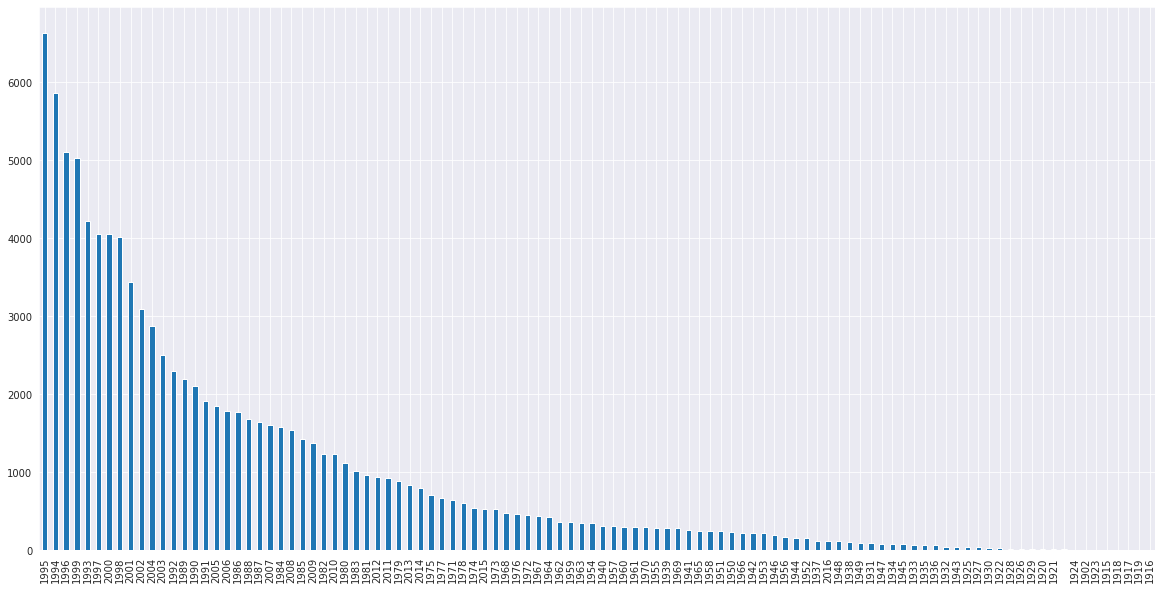

In [24]:
year = movie_df_year['film year'].str.split('|').explode()

print('Jumlah tahun pada film: ', len(year.unique()))
plt.figure(figsize=(20,10))
year.value_counts(ascending=False).plot(kind='bar')

####***Genre***

* Cek jumlah genre film.
* Menampilkan genre film yang telah dirating hingga yang paling sedikit

Jumlah genre film:  20


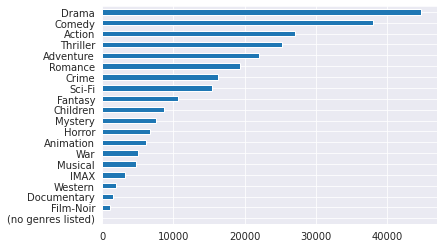

In [25]:
genres = movie_df_year['genres'].str.split('|').explode()

print('Jumlah genre film: ', len(genres.unique()))
genres.value_counts(ascending=True).plot(kind='barh')


####***Title/Judul Film***

* Dua puluh (20) judul film dengan jumlah rating terbanyak 

In [26]:
title_rating = movie_df_year.groupby(['title'])[['rating']].sum()
title_rating = title_rating.nlargest(20,'rating')
title_rating.head(20)

,rating
title,
"Shawshank Redemption, The (1994)",1395.5
Forrest Gump (1994),1382.5
Pulp Fiction (1994),1379.0
"Silence of the Lambs, The (1991)",1258.0
Star Wars: Episode IV - A New Hope (1977),1228.5
"Matrix, The (1999)",1083.5
Schindler's List (1993),1050.0
Jurassic Park (1993),1015.5
Star Wars: Episode V - The Empire Strikes Back (1980),990.5


* Tampilan dalam bentuk *bar chart* agar lebih mudah dibandingkan dan dianalisis

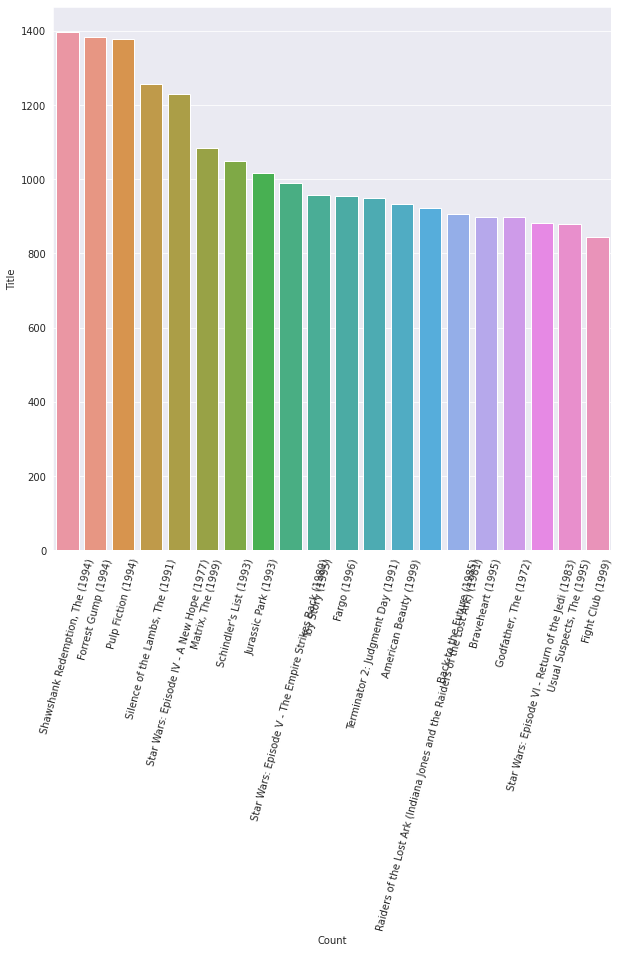

In [27]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75);
sns.barplot(title_rating.index, title_rating['rating']);
plt.ylabel('Title');
plt.xlabel('Count');

####***Rating***

* Nilai minimum rating

In [28]:
min_rating = min(movie_df['rating'])
print(min_rating)

0.5


* Nilai maksimal rating

In [29]:
max_rating = max(movie_df['rating'])
print(max_rating)

5.0


* Nilai rating yang paling banyak diberikan oleh *user* beserta  jumlah ratingnya.

In [30]:
rating_count = dfr.rating.value_counts()
print('Skala dan jumlah rating yang diberikan user adalah :', rating_count)

Skala dan jumlah rating yang diberikan user adalah : 4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64


* Visualisasi nilai rating dan jumlah yang didapatkan masing-masing rating dari *user*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15c88c64c0>]],
      dtype=object)

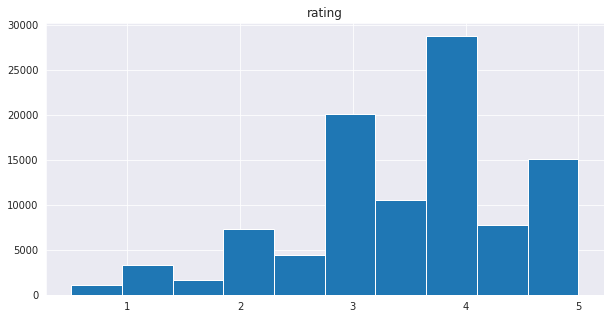

In [31]:
dfr.hist(column='rating', figsize=(10,5))

# **D. *DATA PREPARATION***

• Menyebutkan teknik-teknik pada data *preparation* dan mengaplikasikannya pada dataset

• Menggunakan teknik secara berurutan, rapi, dan disertai dengan penjelasan   kenapa teknik dan tahapan-tahapan tersebut diperlukan pada tahap data *preparation*

• Penjelasan disertakan pada masing-masing *cell.*




###***5. Encoding dan Mapping Data***

####***Encoding data user***

* Mengubah *userId* menjadi *list* tanpa nilai yang sama

In [32]:
user_id = movie_df['userId'].unique().tolist()
print('list userId: ', user_id)

list userId:  [7.0, 9.0, 13.0, 15.0, 19.0, 20.0, 23.0, 26.0, 30.0, 37.0, 43.0, 44.0, 47.0, 48.0, 55.0, 56.0, 63.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 75.0, 77.0, 79.0, 84.0, 86.0, 87.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 97.0, 99.0, 100.0, 106.0, 112.0, 119.0, 120.0, 121.0, 122.0, 124.0, 125.0, 126.0, 128.0, 130.0, 134.0, 136.0, 138.0, 142.0, 146.0, 149.0, 150.0, 152.0, 153.0, 154.0, 157.0, 163.0, 164.0, 165.0, 168.0, 169.0, 173.0, 175.0, 176.0, 177.0, 178.0, 179.0, 184.0, 185.0, 187.0, 193.0, 200.0, 201.0, 205.0, 212.0, 213.0, 215.0, 219.0, 220.0, 224.0, 232.0, 237.0, 240.0, 241.0, 242.0, 247.0, 252.0, 253.0, 261.0, 262.0, 268.0, 272.0, 273.0, 275.0, 282.0, 283.0, 284.0, 285.0, 287.0, 292.0, 293.0, 294.0, 306.0, 311.0, 312.0, 313.0, 314.0, 318.0, 321.0, 324.0, 328.0, 329.0, 333.0, 334.0, 336.0, 343.0, 344.0, 345.0, 350.0, 353.0, 354.0, 355.0, 357.0, 358.0, 361.0, 363.0, 379.0, 380.0, 382.0, 383.0, 390.0, 396.0, 401.0, 402.0, 403.0, 406.0, 407.0, 408.0, 409.0, 410.0, 412.0, 417.0, 41

* Melakukan *encoding userId*

In [33]:
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded userId : ', user_to_user_encoded)

encoded userId :  {7.0: 0, 9.0: 1, 13.0: 2, 15.0: 3, 19.0: 4, 20.0: 5, 23.0: 6, 26.0: 7, 30.0: 8, 37.0: 9, 43.0: 10, 44.0: 11, 47.0: 12, 48.0: 13, 55.0: 14, 56.0: 15, 63.0: 16, 67.0: 17, 68.0: 18, 69.0: 19, 70.0: 20, 72.0: 21, 73.0: 22, 75.0: 23, 77.0: 24, 79.0: 25, 84.0: 26, 86.0: 27, 87.0: 28, 89.0: 29, 90.0: 30, 91.0: 31, 92.0: 32, 93.0: 33, 94.0: 34, 97.0: 35, 99.0: 36, 100.0: 37, 106.0: 38, 112.0: 39, 119.0: 40, 120.0: 41, 121.0: 42, 122.0: 43, 124.0: 44, 125.0: 45, 126.0: 46, 128.0: 47, 130.0: 48, 134.0: 49, 136.0: 50, 138.0: 51, 142.0: 52, 146.0: 53, 149.0: 54, 150.0: 55, 152.0: 56, 153.0: 57, 154.0: 58, 157.0: 59, 163.0: 60, 164.0: 61, 165.0: 62, 168.0: 63, 169.0: 64, 173.0: 65, 175.0: 66, 176.0: 67, 177.0: 68, 178.0: 69, 179.0: 70, 184.0: 71, 185.0: 72, 187.0: 73, 193.0: 74, 200.0: 75, 201.0: 76, 205.0: 77, 212.0: 78, 213.0: 79, 215.0: 80, 219.0: 81, 220.0: 82, 224.0: 83, 232.0: 84, 237.0: 85, 240.0: 86, 241.0: 87, 242.0: 88, 247.0: 89, 252.0: 90, 253.0: 91, 261.0: 92, 262.0: 

* Melakukan proses *encoding* angka ke ke *userId*

In [34]:
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded angka ke userID:  {0: 7.0, 1: 9.0, 2: 13.0, 3: 15.0, 4: 19.0, 5: 20.0, 6: 23.0, 7: 26.0, 8: 30.0, 9: 37.0, 10: 43.0, 11: 44.0, 12: 47.0, 13: 48.0, 14: 55.0, 15: 56.0, 16: 63.0, 17: 67.0, 18: 68.0, 19: 69.0, 20: 70.0, 21: 72.0, 22: 73.0, 23: 75.0, 24: 77.0, 25: 79.0, 26: 84.0, 27: 86.0, 28: 87.0, 29: 89.0, 30: 90.0, 31: 91.0, 32: 92.0, 33: 93.0, 34: 94.0, 35: 97.0, 36: 99.0, 37: 100.0, 38: 106.0, 39: 112.0, 40: 119.0, 41: 120.0, 42: 121.0, 43: 122.0, 44: 124.0, 45: 125.0, 46: 126.0, 47: 128.0, 48: 130.0, 49: 134.0, 50: 136.0, 51: 138.0, 52: 142.0, 53: 146.0, 54: 149.0, 55: 150.0, 56: 152.0, 57: 153.0, 58: 154.0, 59: 157.0, 60: 163.0, 61: 164.0, 62: 165.0, 63: 168.0, 64: 169.0, 65: 173.0, 66: 175.0, 67: 176.0, 68: 177.0, 69: 178.0, 70: 179.0, 71: 184.0, 72: 185.0, 73: 187.0, 74: 193.0, 75: 200.0, 76: 201.0, 77: 205.0, 78: 212.0, 79: 213.0, 80: 215.0, 81: 219.0, 82: 220.0, 83: 224.0, 84: 232.0, 85: 237.0, 86: 240.0, 87: 241.0, 88: 242.0, 89: 247.0, 90: 252.0, 91: 253.0, 92: 261.0,

####***Encoding data film***

* Mengubah *movieId* menjadi *list* tanpa nilai yang sama

In [35]:
movie_id = movie_df['movieId'].unique().tolist()
print('list movieId: ', movie_id)

list movieId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 135, 137, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 

* Melakukan proses *encoding movieId*

In [36]:
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_id)}
print('encoded movieId : ', movie_to_movie_encoded)

encoded movieId :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 34: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 46: 44, 47: 45, 48: 46, 49: 47, 50: 48, 52: 49, 53: 50, 54: 51, 55: 52, 57: 53, 58: 54, 59: 55, 60: 56, 61: 57, 62: 58, 63: 59, 64: 60, 65: 61, 66: 62, 68: 63, 69: 64, 70: 65, 71: 66, 72: 67, 73: 68, 74: 69, 76: 70, 77: 71, 78: 72, 79: 73, 80: 74, 81: 75, 82: 76, 83: 77, 84: 78, 85: 79, 86: 80, 87: 81, 88: 82, 89: 83, 92: 84, 93: 85, 94: 86, 95: 87, 96: 88, 97: 89, 98: 90, 99: 91, 100: 92, 101: 93, 102: 94, 103: 95, 104: 96, 105: 97, 107: 98, 108: 99, 110: 100, 111: 101, 112: 102, 113: 103, 114: 104, 116: 105, 117: 106, 118: 107, 119: 108, 121: 109, 122: 110, 123: 111, 124: 112, 125: 113, 126: 114, 129: 115, 130: 116, 131: 117, 132: 118, 1

* Melakukan proses *encoding* angka ke *movieId*

In [37]:
 movie_encoded_to_movie = {i: x for i, x in enumerate(movie_id)}
print('encoded angka ke userId: ', movie_encoded_to_movie)

encoded angka ke userId:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 34, 33: 35, 34: 36, 35: 37, 36: 38, 37: 39, 38: 40, 39: 41, 40: 42, 41: 43, 42: 44, 43: 45, 44: 46, 45: 47, 46: 48, 47: 49, 48: 50, 49: 52, 50: 53, 51: 54, 52: 55, 53: 57, 54: 58, 55: 59, 56: 60, 57: 61, 58: 62, 59: 63, 60: 64, 61: 65, 62: 66, 63: 68, 64: 69, 65: 70, 66: 71, 67: 72, 68: 73, 69: 74, 70: 76, 71: 77, 72: 78, 73: 79, 74: 80, 75: 81, 76: 82, 77: 83, 78: 84, 79: 85, 80: 86, 81: 87, 82: 88, 83: 89, 84: 92, 85: 93, 86: 94, 87: 95, 88: 96, 89: 97, 90: 98, 91: 99, 92: 100, 93: 101, 94: 102, 95: 103, 96: 104, 97: 105, 98: 107, 99: 108, 100: 110, 101: 111, 102: 112, 103: 113, 104: 114, 105: 116, 106: 117, 107: 118, 108: 119, 109: 121, 110: 122, 111: 123, 112: 124, 113: 125, 114: 126, 115: 129, 116: 130, 117: 131, 118:

####***Mapping data user***

* *Mapping userId* ke *dataframe user*

In [38]:
movie_df['user'] = movie_df['userId'].map(user_to_user_encoded)

* Mendapatkan jumlah *user*

In [39]:
num_users = len(user_to_user_encoded)
print(num_users)

671


####***Mapping data movieId***

*  *Mapping movieId* ke *dataframe movie*

In [40]:
movie_df['movie'] = movie_df['movieId'].map(movie_to_movie_encoded)

* Mendapatkan jumlah *movie*

In [41]:
num_movie = len(movie_encoded_to_movie)
print(num_movie)

9066


###***.6 Split Dataset***

* Mengacak dataset

In [42]:
movie_df = movie_df.sample(frac=1, random_state=3)

* Membuat variabel x untuk mencocokkan data *user* dan *movie* menjadi satu value

In [43]:
x = movie_df[['user', 'movie']].values

*  Membuat variabel y untuk membuat rating dari hasil 

In [44]:
y = movie_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

* Membagi komposisi data latih dan data test adalah 80% data latih dan 20% data validasi

In [45]:
train_indices = int(0.8 * dfr.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 252  543]
 [ 447 4983]
 [ 184 1036]
 ...
 [  62 4412]
 [ 184 3182]
 [ 354 3699]] [0.77777778 1.         0.66666667 ... 0.66666667 0.33333333 0.77777778]


# **E. MODEL *DEVELOPMENT***

• Membuat dan merancang model *machine learning* yang tepat agar dapat memberikan solusi permasalahan.

• Menjelaskan apa saja parameter yang digunakan pada model dan fungsi dari penggunaan parameter tersebut

• Menjelaskan kelebihan dan kekurangan algoritma *machine learning* yang digunakan.

• Memberikan penilaian akurasi dari setiap model yang digunakan terhadap data *test* untuk mengetahui model mana yang memberikan hasil akurasi terbaik.



###***10. Beberapa Pendekatan yang akan digunakan dan diuji pada proyek ini***


1.   *Content Based Filtring*
2.   *Collaborative Filtering dengan RecommenderNet*





####***Content Based Filtering menggunakan Jaccard Similarity***

* Karena rekomendasi akan diberikan berdasarkan genre film yang ditonton sebelumnya oleh *user*, maka pisahkan masing-masing genre dengan fungsi *.explode()*

In [46]:
dfm['genres'] = dfm['genres'].str.split("|")
dfm = dfm.explode('genres')
dfm.head()  

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


* Pindahkan fitur *title* dan *genres* ke dalam *crosstab*

In [47]:
title_genre = pd.crosstab(dfm['title'], dfm['genres'])
title_genre.head()

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
$9.99 (2008),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
'Neath the Arizona Skies (1934),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
'Round Midnight (1986),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


* Definisikan variabel untuk *Jaccard Similarity Measure* dan masukkan ke dalam dataframe

In [48]:
jaccard_similarity_df = pd.DataFrame(1 - squareform(pdist(title_genre.values, metric='jaccard')), 
                                     index=title_genre.index, columns=title_genre.index)

* Cek dataframe *Jaccard Similarity* yang telah dibuat

In [49]:
jaccard_similarity_df.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.0,0.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.000000
$9.99 (2008),0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
'Hellboy': The Seeds of Creation (2004),0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.142857,...,0.142857,0.00,0.00,0.142857,0.2,0.142857,0.142857,0.166667,0.166667,0.142857
'Neath the Arizona Skies (1934),0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
'Round Midnight (1986),0.5,0.0,0.0,0.0,1.0,0.2,0.333333,0.0,0.5,0.250000,...,0.250000,0.25,0.25,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.250000


####***Collaborative Filtering dengan Class RecomemenderNet dari Dicoding .***

* Definisikan variabel untuk menampung dictionary untuk data *movieId*, *title*, dan *genres*

In [50]:
movie_dict = pd.DataFrame({
    'id': movie_df['movieId'].tolist(),
    'title': movie_df['title'].tolist(),
    'genres': movie_df['genres'].tolist()
})
movie_dict = movie_dict.drop_duplicates('id')
movie_dict.head()

,id,title,genres
0,616,"Aristocats, The (1970)",Animation|Children
1,7091,Horse Feathers (1932),Comedy
2,1282,Fantasia (1940),Animation|Children|Fantasy|Musical
3,367,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
4,318,"Shawshank Redemption, The (1994)",Crime|Drama


* Membuat kode *class RecommenderNet* dengan *keras Model class* dari Dicoding      

In [51]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings resto
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

* Lakukan proses *compile* terhadap model.

In [52]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

* Lakukan proses *training*

In [53]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    verbose = 2,
    validation_data = (x_val, y_val)
)

Epoch 1/10
10001/10001 - 121s - loss: 0.6223 - root_mean_squared_error: 0.2278 - val_loss: 0.6038 - val_root_mean_squared_error: 0.2108 - 121s/epoch - 12ms/step
Epoch 2/10
10001/10001 - 117s - loss: 0.5994 - root_mean_squared_error: 0.2037 - val_loss: 0.5997 - val_root_mean_squared_error: 0.2064 - 117s/epoch - 12ms/step
Epoch 3/10
10001/10001 - 120s - loss: 0.5941 - root_mean_squared_error: 0.1978 - val_loss: 0.5987 - val_root_mean_squared_error: 0.2051 - 120s/epoch - 12ms/step
Epoch 4/10
10001/10001 - 133s - loss: 0.5919 - root_mean_squared_error: 0.1951 - val_loss: 0.5973 - val_root_mean_squared_error: 0.2035 - 133s/epoch - 13ms/step
Epoch 5/10
10001/10001 - 121s - loss: 0.5901 - root_mean_squared_error: 0.1930 - val_loss: 0.5974 - val_root_mean_squared_error: 0.2034 - 121s/epoch - 12ms/step
Epoch 6/10
10001/10001 - 111s - loss: 0.5885 - root_mean_squared_error: 0.1912 - val_loss: 0.5976 - val_root_mean_squared_error: 0.2035 - 111s/epoch - 11ms/step
Epoch 7/10
10001/10001 - 107s - lo

# **F. EVALUASI MODEL**

* Menyebutkan dan menjelaskan metrik evaluasi yang digunakan dan mengukur kinerja model berdasarkan hasil/nilai yang didapatkan dari prediksi model metrik evaluasi tersebut

* Menjelaskan bagaimana metrik tersebut bekerja.

Metrik evaluasi yang digunakan pada proyek ini adalah :

1.  *Jaccard index* atau *Jaccard similarity coefficien*
2.  *Root Mean Squared Error (RMSE)*


###***11.Evaluasi Metrik dan Hasil Prediksi dari Content Based Filtering***

#### Tes Prediksi 1 

* Aplikasikan *Jaccard Similarity* tersebut kepada film *Star Wars: Episode I - The Phantom Menace (1999)* sebagai sampel 

In [54]:
jaccard_similarity_series = jaccard_similarity_df.loc['Star Wars: Episode I - The Phantom Menace (1999)'].sort_values(ascending=False)
jaccard_similarity_series.head(10)

title
Time Machine, The (2002)                               1.0
Star Wars: Episode VI - Return of the Jedi (1983)      1.0
Tron (1982)                                            1.0
Journey to the Center of the Earth (2008)              1.0
Ant-Man (2015)                                         1.0
Star Wars: Episode III - Revenge of the Sith (2005)    1.0
Star Wars: Episode IV - A New Hope (1977)              1.0
Robot Overlords (2014)                                 1.0
Sky Captain and the World of Tomorrow (2004)           1.0
Six-String Samurai (1998)                              1.0
Name: Star Wars: Episode I - The Phantom Menace (1999), dtype: float64

####Tes Prediksi 2

* Aplikasikan *Jaccard Similarity* tersebut kepada film *Shin Godzilla (2016)* sebagai sampel kedua

In [55]:
jaccard_similarity_series = jaccard_similarity_df.loc['Shin Godzilla (2016)'].sort_values(ascending=False)
jaccard_similarity_series.head(10)

title
Godzilla vs. Mothra (Mosura tai Gojira) (1964)          1.0
Wolverine, The (2013)                                   1.0
Hellboy II: The Golden Army (2008)                      1.0
Trip to the Moon, A (Voyage dans la lune, Le) (1902)    1.0
Shin Godzilla (2016)                                    1.0
Krull (1983)                                            1.0
X-Men: Apocalypse (2016)                                1.0
Masters of the Universe (1987)                          1.0
Fantastic Four (2015)                                   1.0
Beastmaster 2: Through the Portal of Time (1991)        1.0
Name: Shin Godzilla (2016), dtype: float64

####Tes Prediksi 3

* Aplikasikan *Jaccard Similarity* tersebut kepada film *Toy Story (1995)* sebagai sampel ketiga

In [56]:
jaccard_similarity_series = jaccard_similarity_df.loc['Toy Story (1995)'].sort_values(ascending=False)
jaccard_similarity_series.head(10)

title
Toy Story 2 (1999)                                         1.0
Monsters, Inc. (2001)                                      1.0
Asterix and the Vikings (Astérix et les Vikings) (2006)    1.0
Tale of Despereaux, The (2008)                             1.0
Turbo (2013)                                               1.0
The Good Dinosaur (2015)                                   1.0
Shrek the Third (2007)                                     1.0
Emperor's New Groove, The (2000)                           1.0
Adventures of Rocky and Bullwinkle, The (2000)             1.0
Boxtrolls, The (2014)                                      1.0
Name: Toy Story (1995), dtype: float64

###***12.Evaluasi Metrik dan Hasil Prediksi dari Collaborative Filtering***

#### Visualisasi Evaluasi Metrik *Collaborative Filtering dengan RMSE*

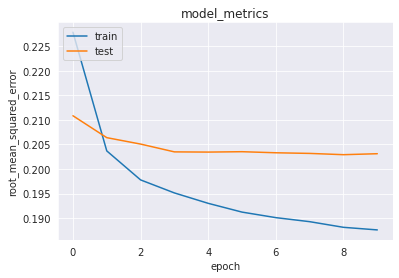

In [57]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Mendapatkan Rekomendasi dari Pendekataan *Collaborative Filtering*

Membuat daftar dari film yang belum pernah ditonton oleh *user* ( gunakan satu *user* sebagi sampel ) 

* Mengambil *sample user*

In [58]:
user_id = movie_df.userId.sample(1).iloc[0]
movie_watched_by_user = movie_df[movie_df.userId == user_id]

* Operator *bitwise* (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 

In [59]:
movie_not_watched = movie_df[~movie_df['movie'].isin(movie_watched_by_user['movie'].values)]['movie'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

* Prediksi dengan menggunakan fungsi *.predict()*

In [60]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Rekomendasi film untuk user: {}'.format(user_id))
print('===' * 9)
print('Film dengan Rating Tinggi dari User')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_dict[movie_dict['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)
 
print('----' * 8)
print('Top 10 Rekomendasi Film Teratas')
print('----' * 8)
 
recommended_movie = movie_dict[movie_dict['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

170/170 [==============================] - 0s 1ms/step
Rekomendasi film untuk user: 299.0
Film dengan Rating Tinggi dari User
--------------------------------
Ed Wood (1994) : Comedy|Drama
Re-Animator (1985) : Comedy|Horror|Sci-Fi
Another Day in Paradise (1998) : Drama
Bringing Out the Dead (1999) : Drama
Vincent (1982) : Animation
--------------------------------
Top 10 Rekomendasi Film Teratas
--------------------------------
Goodfellas (1990) : Crime|Drama
Psycho (1960) : Crime|Horror
Apocalypse Now (1979) : Action|Drama|War
12 Angry Men (1957) : Drama
Godfather, The (1972) : Crime|Drama
Godfather: Part II, The (1974) : Crime|Drama
Third Man, The (1949) : Film-Noir|Mystery|Thriller
Ran (1985) : Drama|War
Raging Bull (1980) : Drama
Henry V (1989) : Action|Drama|Romance|War


# **KESIMPULAN** 

#### ***Kesimpulan Umum***
Berdasarkan hasil prediksi dari kedua pendekatan dapat disimpulkan bahwa model telah mampu memberikan rekomendasi film dengan baik. Pernyataan ini dibuktikan dengan fakta bawha film yang direkomendasikan oleh sistem memiliki kemiripan isi film (bisa dari segi tema cerita, sinopsis, karakter, alur) dengan film yang pernah diberi rating oleh *user*. 

####***Content Based Filtering***
Pendekatan *content based filtering* pada dasarnya akan memberikan rekomendasi film yang punya kemiripan dengan film yang pernah dilihat atau sengaja dicari atau intinya pernah memiliki interaksi dengan *user* (dalam kasus ini kemungkinan besar interaksi yang terjadi adalah *user* sudah menonton film tersebut, terbukti dengan *user* memberikan rating terhadap film tersebut). Pada pendekatan ini untuk menilai apakah film yang direkomendasikan memang memiliki kemiripan maka dapat dilihat dari nilai *similarity* yang didapatkan. Pada metode ini *Jaccar Similarity* memberikan 10 film teratas yang memiliki nilai *similarity* = 1, artinya film yang berinteraksi dengan *user* memiliki kesamaan dengan film yang direkomendasikan. Untuk mengecek kebenaran dari pengukuran metrik ini sebenarnya dibutuhkan juga eksplorasi dan pengetahuan peneliti mengenai film yang film yang pernah ditonton dan film yang direkomendasikan oleh sistem. 
Pada pada pendekatan *content based filtering* dengan *Jaccard Similarity* ini agar meyakinkan maka dilakukan tiga (3) kali pengetesan prediksi terhadap tiga (3) buah film yang berbeda. Berikut analisis hasil dari ketiga sampel tersebut:
  * Tes 1 : Star Wars: Episode I - The Phantom Menace (1999). Film yang direkomendasikan oleh sistem diantaranya adalah Star Wars: Episode VI - Return of the Jedi (1983), Star Wars: Episode III - Revenge of the Sith (2005), Star Wars: Episode IV - A New Hope (1977). Bisa dilihat bahwa beberapa film yang direkomendasikan tersebut memang adalah film yang sama dengan episode yang berbeda. Yaitu film tentang pertempuran pada sebuah galaksi fiksi, ada robot, alien, senjata-senjata dan pesawat canggih. 
  * Tes 2 : Shin Godzilla (2016. Film yang direkomendasikan oleh sistem diantaranya adalah Godzilla vs. Mothra (Mosura tai Gojira) (1964), Wolverine, The (2013), Hellboy II: The Golden Army (2008). Film yang direkomendasikan tersebut semuanya adalah tentang pertempuran, kepahlawanan,live action. 
  * Tes 3 :  Toy Story (1995). Film yang direkomendasikan oleh sistem diantaranya adalah :Toy Story 2 (1999), Monsters, Inc. (2001), Asterix and the Vikings (Astérix et les Vikings) (2006). Kesamaan dari semua film ini adalah bahwa semuanya adalah film animasi. Jadi bagi *user* yang menyukai dan memberikan rating film animasi Toy Story (1995), sistem memprediksi bahwa *user* tersebut juga akan menyukai film animasi serupa lainnya seperti yang telah direkomendasikan diatas. 




####***Collaborative Filtering***
Pendekatan *Collaborative Filtering* pada dasarnya akan memberikan rekomendasi film yang mungkin disukai oleh *user* berdasarkan pengalaman *user* lainnya (pada kasus ini diukur dengan rating yang diberikan *user* lain). Pada proyek ini digunakan *class RecommenderNet* dari Dicoding untuk memberikan rekomendasi film. Hasil yang diberikan dapat diukur berdasarkan nilai RMSE yang didapatkan. Metrik RMSE pada kasus ini memberikan nilai *root_mean_squared_error*: 0.1876, dan *val_root_mean_squared_error*: 0.2031. Ini merupakan nilai yang baik dan dapat digunakan sebagai sistem rekomendasi pada sebuah aplikasi. untuk menilai  keakuratan rekomendasi oleh sistem tersebut maka perlu dianalisis secara manual, dan tentunya akan melibatkan persepsi subjektif dari peneliti. Namun hal ini bisa diterima karena perlakuan yang samapun akan dilakukan oleh user.  Berikut yang diberi rating tinggi oleh user 299.0 adalah :
  * Ed Wood (1994) : Comedy|Drama
  * Re-Animator (1985) : Comedy|Horror|Sci-Fi
  * Another Day in Paradise (1998) : Drama
  * Bringing Out the Dead (1999) : Drama
  * Vincent (1982) : Animation

Sedangkan 10 film teratas yang direkomendasikan oleh sistem adalah :

  * Goodfellas (1990) : Crime|Drama
  * Psycho (1960) : Crime|Horror
  * Apocalypse Now (1979) : Action|Drama|War
  * 12 Angry Men (1957) : Drama
  * Godfather, The (1972) : Crime|Drama
  * Godfather: Part II, The (1974) : Crime|Drama
  * Third Man, The (1949) : Film-Noir|Mystery|Thriller
  * Ran (1985) : Drama|War
  * Raging Bull (1980) : Drama
  * Henry V (1989) : Action|Drama|Romance|War

Dapat dilihat bahwa film terbanyak yang diberikan rating oleh user adalah film dengan genre Drama yaitu 3 dari 5 film, 1 dengan genre animation, 1 comedy|horror|sci-fi. Oleh karena itu sistem juga merekomendasikan film bergenre Drama kepada user sebanyak 8 dari 10 film teratas, karena film ini juga disukai dan mendapatkan rating yang tinggi dari banyak user lain . 